___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
from skimpy import clean_columns
df = clean_columns(df)

14 column names have been cleaned

In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customer_id,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
credit_score,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
num_of_products,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
has_cr_card,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
is_active_member,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimated_salary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
# I decided to drop below columns since it will not affect my model
df.drop(columns=["row_number", "customer_id", "surname"], inplace=True)

In [8]:
df.shape

(10000, 11)

In [9]:
df.duplicated().sum()

0

## credit_score

In [10]:
df.describe()["credit_score"]

count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: credit_score, dtype: float64

<AxesSubplot:xlabel='credit_score', ylabel='Density'>

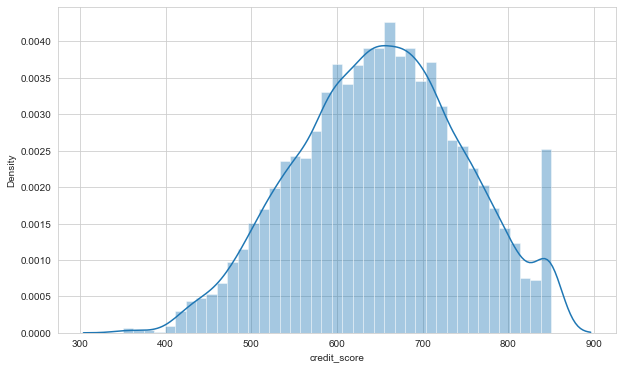

In [11]:
sns.distplot(df.credit_score)

## geography

In [12]:
df.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

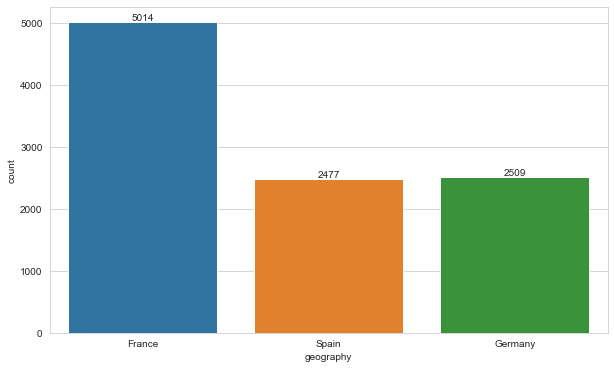

In [13]:
ax = sns.countplot(df.geography)
for i in ax.containers:
    ax.bar_label(i);

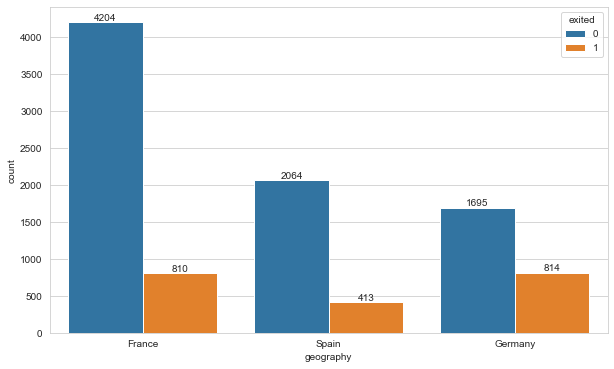

In [14]:
ax = sns.countplot(df.geography, hue=df.exited)
for i in ax.containers:
    ax.bar_label(i);

In [15]:
df.replace({"geography":{"France":0, "Germany":1, "Spain":2}}, inplace=True)

In [16]:
df.geography.value_counts()

0    5014
1    2509
2    2477
Name: geography, dtype: int64

## gender

In [17]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

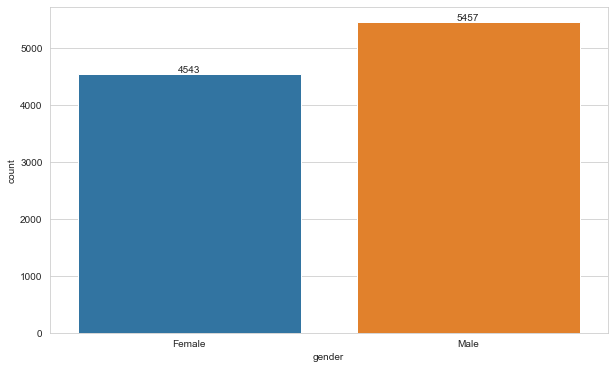

In [18]:
ax = sns.countplot(df.gender)
for i in ax.containers:
    ax.bar_label(i);

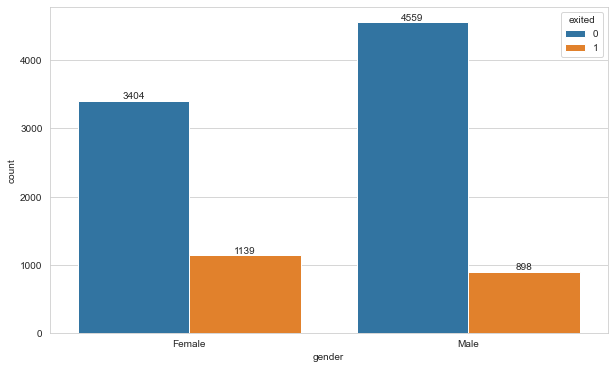

In [19]:
ax = sns.countplot(df.gender, hue=df.exited)
for i in ax.containers:
    ax.bar_label(i);

In [20]:
# we can concluded that the women are more eager to be churn than men

In [21]:
df.gender = df.gender.map({"Male":1, "Female":0})

In [22]:
df.gender.value_counts()

1    5457
0    4543
Name: gender, dtype: int64

## age

In [23]:
df.describe()["age"]

count   10000.000
mean       38.922
std        10.488
min        18.000
25%        32.000
50%        37.000
75%        44.000
max        92.000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

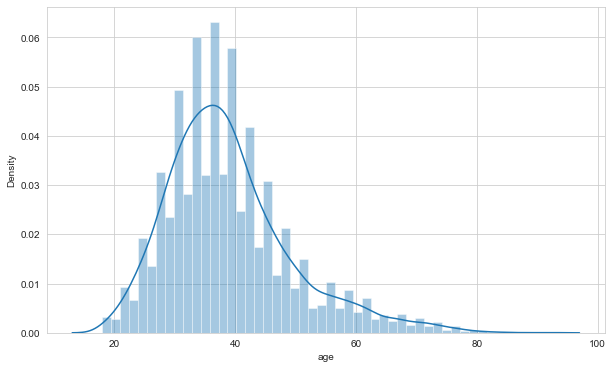

In [24]:
sns.distplot(df.age)

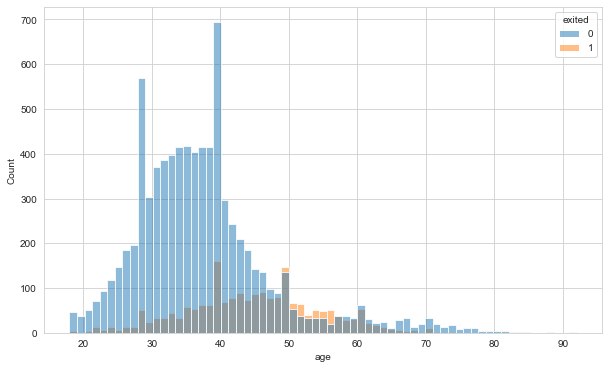

In [25]:
sns.histplot(x=df.age, hue=df.exited, fill=True);

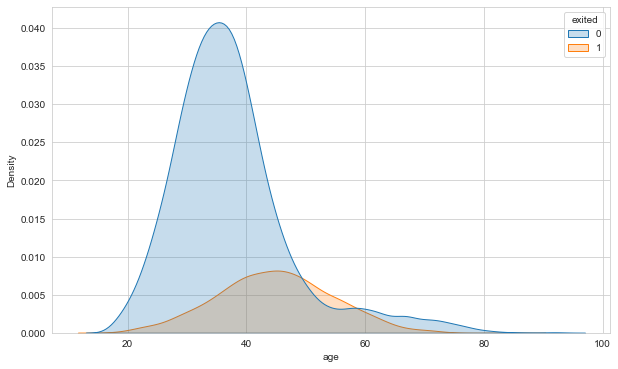

In [26]:
sns.kdeplot(x=df.age, hue=df.exited, fill=True);

## tenure

In [27]:
df.tenure.value_counts().sort_index()

0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: tenure, dtype: int64

In [28]:
df.tenure.value_counts().sort_values()

0      413
10     490
6      967
9      984
4      989
3     1009
5     1012
8     1025
7     1028
1     1035
2     1048
Name: tenure, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='count'>

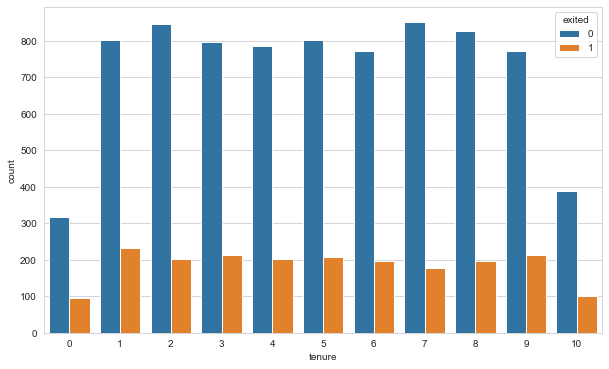

In [29]:
sns.countplot(df.tenure, hue=df.exited)

## balance

In [30]:
df.describe()["balance"]

count    10000.000
mean     76485.889
std      62397.405
min          0.000
25%          0.000
50%      97198.540
75%     127644.240
max     250898.090
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance', ylabel='Density'>

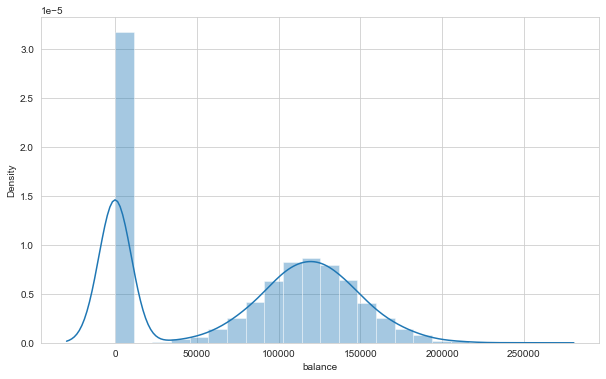

In [31]:
sns.distplot(df.balance)

## num_of_products

In [32]:
df.num_of_products.value_counts()

1    5084
2    4590
3     266
4      60
Name: num_of_products, dtype: int64

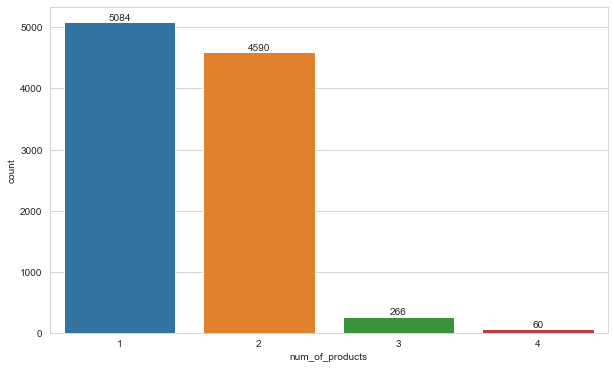

In [33]:
ax = sns.countplot(df.num_of_products)
for i in ax.containers:
    ax.bar_label(i);

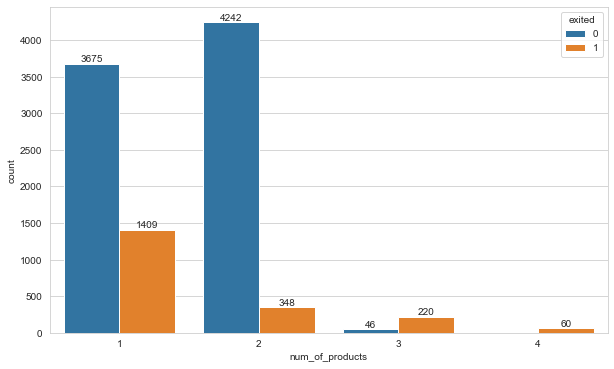

In [34]:
ax = sns.countplot(df.num_of_products, hue=df.exited)
for i in ax.containers:
    ax.bar_label(i);

In [35]:
# if num_of_products is more than 2, it is eager to be churn nearly always

## has_cr_card

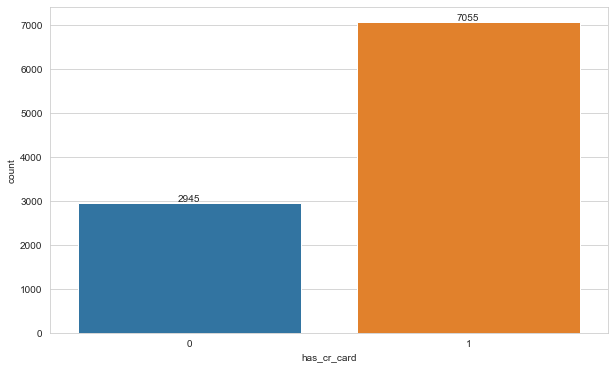

In [36]:
ax = sns.countplot(df.has_cr_card)
for i in ax.containers:
    ax.bar_label(i);

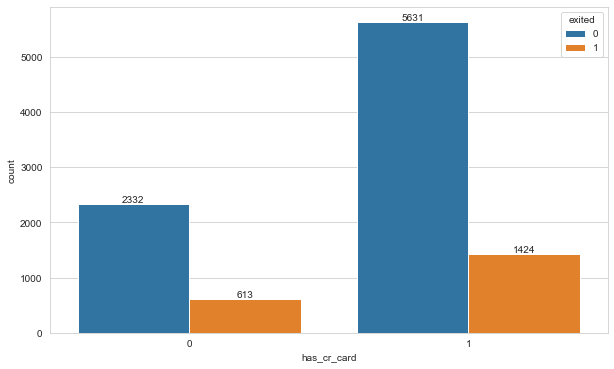

In [37]:
ax = sns.countplot(df.has_cr_card, hue=df.exited)
for i in ax.containers:
    ax.bar_label(i);

## is_active_member

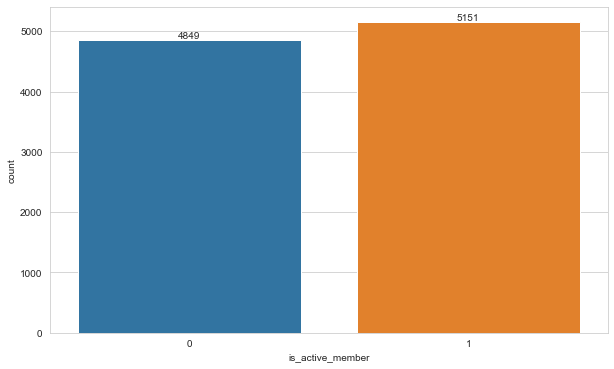

In [38]:
ax = sns.countplot(df.is_active_member)
for i in ax.containers:
    ax.bar_label(i);

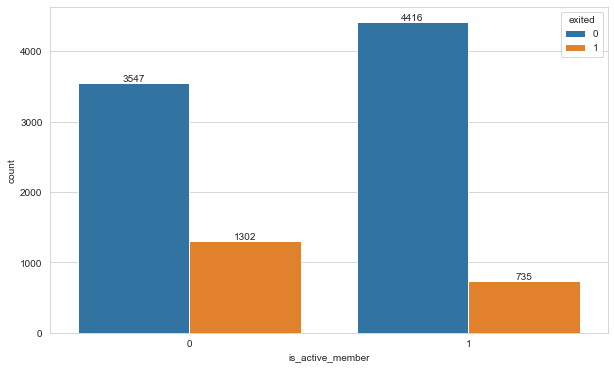

In [39]:
ax = sns.countplot(df.is_active_member, hue=df.exited)
for i in ax.containers:
    ax.bar_label(i);

## estimated_salary

In [40]:
df.describe()["estimated_salary"]

count    10000.000
mean    100090.240
std      57510.493
min         11.580
25%      51002.110
50%     100193.915
75%     149388.247
max     199992.480
Name: estimated_salary, dtype: float64

<AxesSubplot:xlabel='estimated_salary', ylabel='Density'>

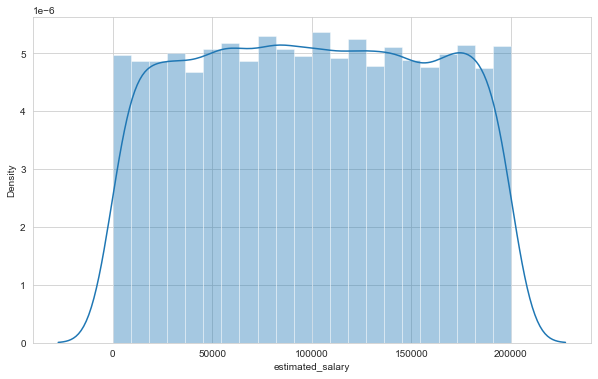

In [41]:
sns.distplot(df.estimated_salary)

##  Target Feature (Exited)

In [42]:
df.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

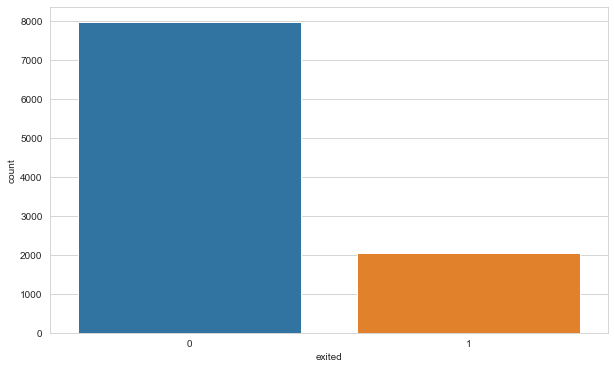

In [43]:
sns.countplot(df.exited);

In [44]:
df.corr()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
credit_score,1.000,0.008,-0.003,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
geography,0.008,1.000,0.005,0.023,0.004,0.069,0.004,-0.009,0.007,-0.001,0.036
gender,-0.003,0.005,1.000,-0.028,0.015,0.012,-0.022,0.006,0.023,-0.008,-0.107
age,-0.004,0.023,-0.028,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
tenure,0.001,0.004,0.015,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
balance,0.006,0.069,0.012,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
num_of_products,0.012,0.004,-0.022,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
has_cr_card,-0.005,-0.009,0.006,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
is_active_member,0.026,0.007,0.023,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
estimated_salary,-0.001,-0.001,-0.008,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


<AxesSubplot:>

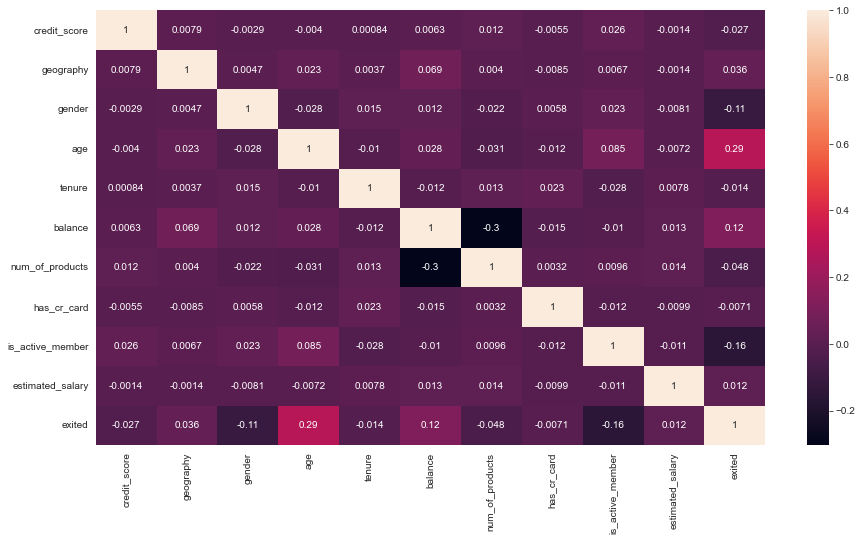

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [46]:
df.corr()["exited"].drop("exited").sort_values()

is_active_member   -0.156
gender             -0.107
num_of_products    -0.048
credit_score       -0.027
tenure             -0.014
has_cr_card        -0.007
estimated_salary    0.012
geography           0.036
balance             0.119
age                 0.285
Name: exited, dtype: float64

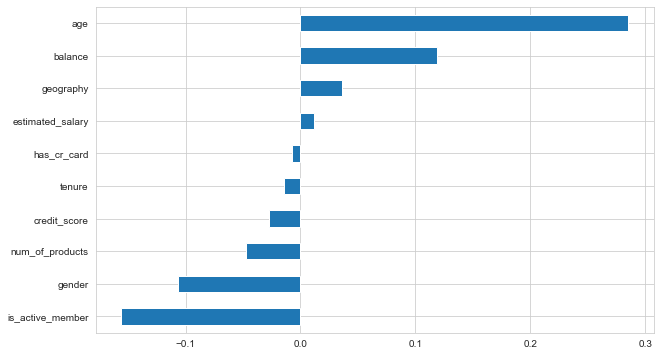

In [47]:
df.corr()["exited"][:-1].sort_values().plot.barh();

# Preprocessing of Data
- Train | Test Split, Scalling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
X = df.drop(columns="exited")
y = df.exited

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [51]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8000, 10)
Train target shape   :  (8000,)
Test features shape  :  (2000, 10)
Test target shape    :  (2000,)


In [52]:
scaler = MinMaxScaler()

In [53]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [55]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [56]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=600)

Epoch 1/600
57/57 [==============================] - 1s 8ms/step - loss: 0.6410 - accuracy: 0.7539 - val_loss: 0.5761 - val_accuracy: 0.8025
Epoch 2/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7956 - val_loss: 0.4969 - val_accuracy: 0.8025
Epoch 3/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7956 - val_loss: 0.4882 - val_accuracy: 0.8025
Epoch 4/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7956 - val_loss: 0.4810 - val_accuracy: 0.8025
Epoch 5/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7956 - val_loss: 0.4730 - val_accuracy: 0.8025
Epoch 6/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7956 - val_loss: 0.4641 - val_accuracy: 0.8025
Epoch 7/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7956 - val_loss: 0.4554 - val_accuracy: 0.8025
Epoch 8/600
5

Epoch 59/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8575 - val_loss: 0.3496 - val_accuracy: 0.8662
Epoch 60/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8569 - val_loss: 0.3476 - val_accuracy: 0.8650
Epoch 61/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8561 - val_loss: 0.3509 - val_accuracy: 0.8650
Epoch 62/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3415 - accuracy: 0.8574 - val_loss: 0.3471 - val_accuracy: 0.8650
Epoch 63/600
57/57 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.8583 - val_loss: 0.3472 - val_accuracy: 0.8687
Epoch 64/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8576 - val_loss: 0.3567 - val_accuracy: 0.8662
Epoch 65/600
57/57 [==============================] - 0s 4ms/step - loss: 0.3430 - accuracy: 0.8572 - val_loss: 0.3504 - val_accuracy: 0.8675
Epoch 

57/57 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8624 - val_loss: 0.3431 - val_accuracy: 0.8650
Epoch 174/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8615 - val_loss: 0.3421 - val_accuracy: 0.8675
Epoch 175/600
57/57 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8643 - val_loss: 0.3444 - val_accuracy: 0.8675
Epoch 176/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8639 - val_loss: 0.3384 - val_accuracy: 0.8737
Epoch 177/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8624 - val_loss: 0.3402 - val_accuracy: 0.8737
Epoch 178/600
57/57 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8633 - val_loss: 0.3468 - val_accuracy: 0.8625
Epoch 179/600
57/57 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8653 - val_loss: 0.3487 - val_accuracy: 0.8675
Epoch 180/600

57/57 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.8656 - val_loss: 0.3377 - val_accuracy: 0.8700
Epoch 288/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8653 - val_loss: 0.3398 - val_accuracy: 0.8625
Epoch 289/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8639 - val_loss: 0.3400 - val_accuracy: 0.8675
Epoch 290/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8646 - val_loss: 0.3418 - val_accuracy: 0.8687
Epoch 291/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8654 - val_loss: 0.3461 - val_accuracy: 0.8600
Epoch 292/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8644 - val_loss: 0.3410 - val_accuracy: 0.8600
Epoch 293/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8660 - val_loss: 0.3528 - val_accuracy: 0.8587
Epoch 294/600

57/57 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8668 - val_loss: 0.3456 - val_accuracy: 0.8612
Epoch 402/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3202 - accuracy: 0.8671 - val_loss: 0.3460 - val_accuracy: 0.8637
Epoch 403/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8679 - val_loss: 0.3413 - val_accuracy: 0.8587
Epoch 404/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8654 - val_loss: 0.3436 - val_accuracy: 0.8612
Epoch 405/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8651 - val_loss: 0.3448 - val_accuracy: 0.8650
Epoch 406/600
57/57 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8667 - val_loss: 0.3481 - val_accuracy: 0.8687
Epoch 407/600
57/57 [==============================] - 0s 1ms/step - loss: 0.3204 - accuracy: 0.8656 - val_loss: 0.3480 - val_accuracy: 0.8662
Epoch 408/600

57/57 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8690 - val_loss: 0.3467 - val_accuracy: 0.8587
Epoch 516/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8669 - val_loss: 0.3466 - val_accuracy: 0.8637
Epoch 517/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8669 - val_loss: 0.3530 - val_accuracy: 0.8562
Epoch 518/600
57/57 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8685 - val_loss: 0.3511 - val_accuracy: 0.8587
Epoch 519/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8683 - val_loss: 0.3542 - val_accuracy: 0.8575
Epoch 520/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8672 - val_loss: 0.3415 - val_accuracy: 0.8650
Epoch 521/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8685 - val_loss: 0.3411 - val_accuracy: 0.8625
Epoch 522/600

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [58]:
loss_df = pd.DataFrame(model.history.history)

In [59]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.641,0.754,0.576,0.803
1,0.535,0.796,0.497,0.803
2,0.500,0.796,0.488,0.803
3,0.494,0.796,0.481,0.803
4,0.488,0.796,0.473,0.803


<AxesSubplot:>

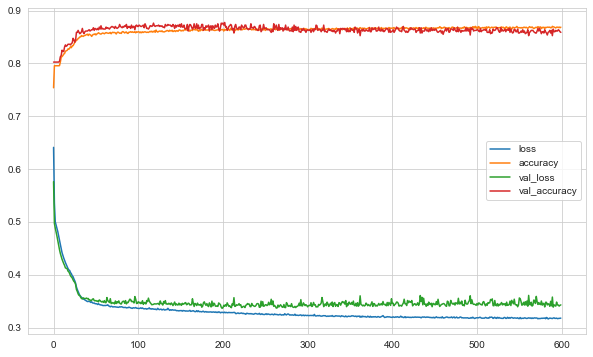

In [60]:
loss_df.plot()

In [61]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8550


[0.3633102774620056, 0.8550000190734863]

In [62]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3633102774620056
accuracy :  0.8550000190734863


In [63]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 909us/step
[[1536   57]
 [ 233  174]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.43      0.55       407

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



### Precision-Recall Curve and AP (Average Precision) for model

63/63 [==============================] - 0s 810us/step


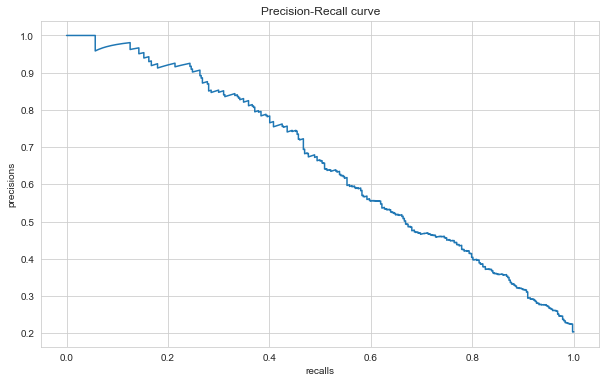

In [64]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="ANN")
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.title("Precision-Recall curve");

In [65]:
average_precision_score(y_test, y_pred_proba)

0.657906985760502

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [66]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [67]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [68]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=600, class_weight=class_weights)

Epoch 1/600
57/57 [==============================] - 1s 5ms/step - loss: 0.6719 - accuracy: 0.6519 - val_loss: 0.6330 - val_accuracy: 0.6400
Epoch 2/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6619 - val_loss: 0.6277 - val_accuracy: 0.6438
Epoch 3/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.6510 - val_loss: 0.6277 - val_accuracy: 0.6562
Epoch 4/600
57/57 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6451 - val_loss: 0.6322 - val_accuracy: 0.6500
Epoch 5/600
57/57 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.6578 - val_loss: 0.6108 - val_accuracy: 0.6725
Epoch 6/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.6683 - val_loss: 0.5970 - val_accuracy: 0.6888
Epoch 7/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6712 - val_loss: 0.5927 - val_accuracy: 0.6875
Epoch 8/600
5

Epoch 59/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7728 - val_loss: 0.4950 - val_accuracy: 0.7550
Epoch 60/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7814 - val_loss: 0.5269 - val_accuracy: 0.7362
Epoch 61/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7767 - val_loss: 0.5414 - val_accuracy: 0.7250
Epoch 62/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.7803 - val_loss: 0.5565 - val_accuracy: 0.7163
Epoch 63/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7744 - val_loss: 0.5147 - val_accuracy: 0.7412
Epoch 64/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7724 - val_loss: 0.4918 - val_accuracy: 0.7650
Epoch 65/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7735 - val_loss: 0.4789 - val_accuracy: 0.7725
Epoch 

57/57 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8015 - val_loss: 0.5060 - val_accuracy: 0.7613
Epoch 174/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7978 - val_loss: 0.4037 - val_accuracy: 0.8263
Epoch 175/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8028 - val_loss: 0.5005 - val_accuracy: 0.7600
Epoch 176/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8001 - val_loss: 0.5176 - val_accuracy: 0.7563
Epoch 177/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8072 - val_loss: 0.5623 - val_accuracy: 0.7262
Epoch 178/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8014 - val_loss: 0.5025 - val_accuracy: 0.7600
Epoch 179/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7978 - val_loss: 0.5479 - val_accuracy: 0.7387
Epoch 180/600

57/57 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8057 - val_loss: 0.4766 - val_accuracy: 0.7750
Epoch 288/600
57/57 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8074 - val_loss: 0.4584 - val_accuracy: 0.7900
Epoch 289/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8058 - val_loss: 0.4678 - val_accuracy: 0.7825
Epoch 290/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8082 - val_loss: 0.4814 - val_accuracy: 0.7800
Epoch 291/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8089 - val_loss: 0.4843 - val_accuracy: 0.7725
Epoch 292/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.8101 - val_loss: 0.5103 - val_accuracy: 0.7600
Epoch 293/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8078 - val_loss: 0.4648 - val_accuracy: 0.7812
Epoch 294/600

57/57 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8133 - val_loss: 0.5188 - val_accuracy: 0.7538
Epoch 402/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8082 - val_loss: 0.4544 - val_accuracy: 0.7875
Epoch 403/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8147 - val_loss: 0.4441 - val_accuracy: 0.7950
Epoch 404/600
57/57 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8106 - val_loss: 0.4891 - val_accuracy: 0.7675
Epoch 405/600
57/57 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8079 - val_loss: 0.4564 - val_accuracy: 0.7875
Epoch 406/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8158 - val_loss: 0.4667 - val_accuracy: 0.7862
Epoch 407/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8100 - val_loss: 0.4729 - val_accuracy: 0.7837
Epoch 408/600

57/57 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8189 - val_loss: 0.4613 - val_accuracy: 0.7862
Epoch 516/600
57/57 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8171 - val_loss: 0.5397 - val_accuracy: 0.7275
Epoch 517/600
57/57 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8136 - val_loss: 0.4511 - val_accuracy: 0.7912
Epoch 518/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8136 - val_loss: 0.4904 - val_accuracy: 0.7663
Epoch 519/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8121 - val_loss: 0.4744 - val_accuracy: 0.7738
Epoch 520/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8138 - val_loss: 0.5229 - val_accuracy: 0.7425
Epoch 521/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8146 - val_loss: 0.5232 - val_accuracy: 0.7462
Epoch 522/600

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                176       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.672,0.652,0.633,0.640
1,0.652,0.662,0.628,0.644
2,0.635,0.651,0.628,0.656
3,0.622,0.645,0.632,0.650
4,0.611,0.658,0.611,0.673


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

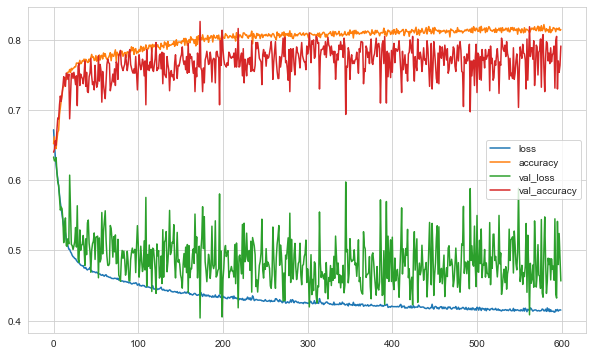

In [71]:
loss_df.plot();

In [72]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 828us/step
[[1302  291]
 [ 138  269]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1593
           1       0.48      0.66      0.56       407

    accuracy                           0.79      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



### Precision-Recall Curve and AP (Average Precision) for model

63/63 [==============================] - 0s 1ms/step


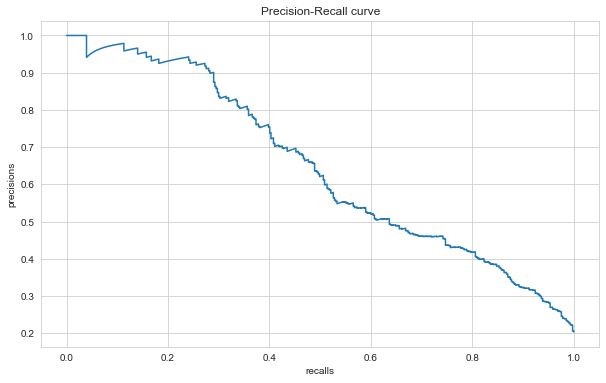

In [73]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="ANN")
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.title("Precision-Recall curve")
plt.show()

In [74]:
average_precision_score(y_test, y_pred_proba)

0.6473356357143389

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [75]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])



In [76]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=600, class_weight=class_weights)

Epoch 1/600
57/57 [==============================] - 1s 7ms/step - loss: 0.6653 - accuracy: 0.5325 - val_loss: 0.6975 - val_accuracy: 0.6087
Epoch 2/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6667 - val_loss: 0.6055 - val_accuracy: 0.6988
Epoch 3/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7161 - val_loss: 0.5219 - val_accuracy: 0.7412
Epoch 4/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7246 - val_loss: 0.5136 - val_accuracy: 0.7450
Epoch 5/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7444 - val_loss: 0.4895 - val_accuracy: 0.7650
Epoch 6/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.7525 - val_loss: 0.6055 - val_accuracy: 0.6775
Epoch 7/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7493 - val_loss: 0.5887 - val_accuracy: 0.6837
Epoch 8/600
5

Epoch 59/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7976 - val_loss: 0.4782 - val_accuracy: 0.7800
Epoch 60/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8008 - val_loss: 0.4161 - val_accuracy: 0.8075
Epoch 61/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8067 - val_loss: 0.4624 - val_accuracy: 0.7812
Epoch 62/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7937 - val_loss: 0.5143 - val_accuracy: 0.7450
Epoch 63/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8028 - val_loss: 0.5044 - val_accuracy: 0.7500
Epoch 64/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8018 - val_loss: 0.4861 - val_accuracy: 0.7663
Epoch 65/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8024 - val_loss: 0.4997 - val_accuracy: 0.7538
Epoch 

57/57 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8053 - val_loss: 0.4968 - val_accuracy: 0.7713
Epoch 174/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8075 - val_loss: 0.5513 - val_accuracy: 0.7362
Epoch 175/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7997 - val_loss: 0.4873 - val_accuracy: 0.7675
Epoch 176/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8054 - val_loss: 0.4861 - val_accuracy: 0.7713
Epoch 177/600
57/57 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8046 - val_loss: 0.5353 - val_accuracy: 0.7412
Epoch 178/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8004 - val_loss: 0.5092 - val_accuracy: 0.7638
Epoch 179/600
57/57 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.7986 - val_loss: 0.4671 - val_accuracy: 0.7763
Epoch 180/600

57/57 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8104 - val_loss: 0.4897 - val_accuracy: 0.7725
Epoch 288/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8060 - val_loss: 0.4728 - val_accuracy: 0.7850
Epoch 289/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8115 - val_loss: 0.5240 - val_accuracy: 0.7588
Epoch 290/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8118 - val_loss: 0.4852 - val_accuracy: 0.7788
Epoch 291/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8097 - val_loss: 0.5140 - val_accuracy: 0.7613
Epoch 292/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8046 - val_loss: 0.4762 - val_accuracy: 0.7837
Epoch 293/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8121 - val_loss: 0.5269 - val_accuracy: 0.7638
Epoch 294/600

57/57 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8153 - val_loss: 0.5153 - val_accuracy: 0.7625
Epoch 402/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8118 - val_loss: 0.4876 - val_accuracy: 0.7812
Epoch 403/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8138 - val_loss: 0.5451 - val_accuracy: 0.7600
Epoch 404/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8119 - val_loss: 0.5211 - val_accuracy: 0.7675
Epoch 405/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8143 - val_loss: 0.5069 - val_accuracy: 0.7675
Epoch 406/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8150 - val_loss: 0.5449 - val_accuracy: 0.7613
Epoch 407/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8133 - val_loss: 0.5387 - val_accuracy: 0.7625
Epoch 408/600

57/57 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8147 - val_loss: 0.5424 - val_accuracy: 0.7613
Epoch 516/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8150 - val_loss: 0.5161 - val_accuracy: 0.7675
Epoch 517/600
57/57 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8135 - val_loss: 0.5093 - val_accuracy: 0.7738
Epoch 518/600
57/57 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8190 - val_loss: 0.4870 - val_accuracy: 0.7812
Epoch 519/600
57/57 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8146 - val_loss: 0.5081 - val_accuracy: 0.7675
Epoch 520/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8168 - val_loss: 0.5317 - val_accuracy: 0.7538
Epoch 521/600
57/57 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8135 - val_loss: 0.5022 - val_accuracy: 0.7725
Epoch 522/600

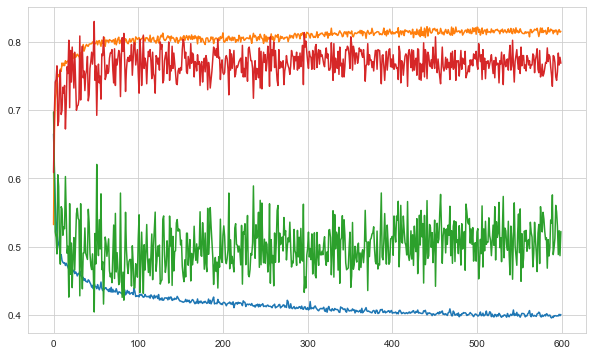

In [77]:
loss_df = pd.DataFrame(model.history.history)
plt.plot(loss_df);

In [78]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 985us/step
[[1243  350]
 [ 140  267]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1593
           1       0.43      0.66      0.52       407

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.80      0.76      0.77      2000



### Add Dropout Layer

In [79]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [80]:
model.fit(X_train, y_train, validation_split=0.15, batch_size=100, epochs=600, class_weight=class_weights)

Epoch 1/600
68/68 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 0.6845 - val_accuracy: 0.6025
Epoch 2/600
68/68 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.6256 - val_loss: 0.6857 - val_accuracy: 0.5600
Epoch 3/600
68/68 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5749 - val_loss: 0.6608 - val_accuracy: 0.6617
Epoch 4/600
68/68 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.5932 - val_loss: 0.6353 - val_accuracy: 0.6875
Epoch 5/600
68/68 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5746 - val_loss: 0.6396 - val_accuracy: 0.6533
Epoch 6/600
68/68 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.5887 - val_loss: 0.6317 - val_accuracy: 0.6708
Epoch 7/600
68/68 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6194 - val_loss: 0.6328 - val_accuracy: 0.6558
Epoch 8/600
6

Epoch 59/600
68/68 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7491 - val_loss: 0.4984 - val_accuracy: 0.7542
Epoch 60/600
68/68 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7453 - val_loss: 0.4900 - val_accuracy: 0.7658
Epoch 61/600
68/68 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.7459 - val_loss: 0.5121 - val_accuracy: 0.7517
Epoch 62/600
68/68 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7487 - val_loss: 0.5094 - val_accuracy: 0.7517
Epoch 63/600
68/68 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7518 - val_loss: 0.5079 - val_accuracy: 0.7517
Epoch 64/600
68/68 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7490 - val_loss: 0.5006 - val_accuracy: 0.7508
Epoch 65/600
68/68 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7494 - val_loss: 0.4998 - val_accuracy: 0.7575
Epoch 

68/68 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7575 - val_loss: 0.4634 - val_accuracy: 0.7908
Epoch 174/600
68/68 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7671 - val_loss: 0.4732 - val_accuracy: 0.7833
Epoch 175/600
68/68 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7632 - val_loss: 0.4698 - val_accuracy: 0.7833
Epoch 176/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7669 - val_loss: 0.4827 - val_accuracy: 0.7758
Epoch 177/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.7635 - val_loss: 0.4758 - val_accuracy: 0.7758
Epoch 178/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7659 - val_loss: 0.4793 - val_accuracy: 0.7733
Epoch 179/600
68/68 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7610 - val_loss: 0.4794 - val_accuracy: 0.7733
Epoch 180/600

68/68 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7626 - val_loss: 0.4969 - val_accuracy: 0.7617
Epoch 288/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7690 - val_loss: 0.4875 - val_accuracy: 0.7717
Epoch 289/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7654 - val_loss: 0.4892 - val_accuracy: 0.7758
Epoch 290/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7640 - val_loss: 0.4804 - val_accuracy: 0.7775
Epoch 291/600
68/68 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.7672 - val_loss: 0.4761 - val_accuracy: 0.7825
Epoch 292/600
68/68 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7644 - val_loss: 0.4953 - val_accuracy: 0.7675
Epoch 293/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7703 - val_loss: 0.4846 - val_accuracy: 0.7700
Epoch 294/600

68/68 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7612 - val_loss: 0.4848 - val_accuracy: 0.7733
Epoch 402/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7556 - val_loss: 0.4901 - val_accuracy: 0.7717
Epoch 403/600
68/68 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7493 - val_loss: 0.4792 - val_accuracy: 0.7767
Epoch 404/600
68/68 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.7601 - val_loss: 0.4985 - val_accuracy: 0.7733
Epoch 405/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7578 - val_loss: 0.4786 - val_accuracy: 0.7783
Epoch 406/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7719 - val_loss: 0.4840 - val_accuracy: 0.7708
Epoch 407/600
68/68 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7628 - val_loss: 0.4899 - val_accuracy: 0.7692
Epoch 408/600

68/68 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.7621 - val_loss: 0.5078 - val_accuracy: 0.7550
Epoch 516/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.7576 - val_loss: 0.4937 - val_accuracy: 0.7725
Epoch 517/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7722 - val_loss: 0.4864 - val_accuracy: 0.7750
Epoch 518/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7616 - val_loss: 0.4763 - val_accuracy: 0.7867
Epoch 519/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7656 - val_loss: 0.4834 - val_accuracy: 0.7833
Epoch 520/600
68/68 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.7694 - val_loss: 0.4921 - val_accuracy: 0.7775
Epoch 521/600
68/68 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7701 - val_loss: 0.4953 - val_accuracy: 0.7708
Epoch 522/600

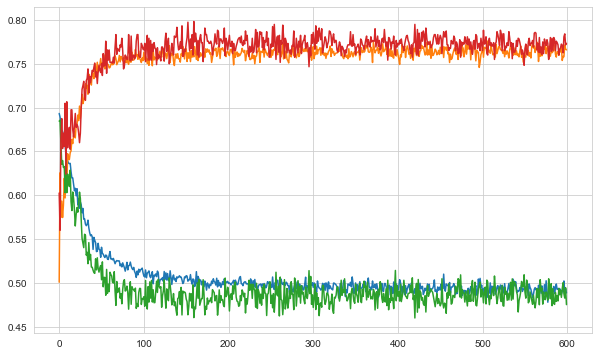

In [81]:
loss_df = pd.DataFrame(model.history.history)
plt.plot(loss_df);

In [82]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 974us/step
[[1239  354]
 [ 132  275]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1593
           1       0.44      0.68      0.53       407

    accuracy                           0.76      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.76      0.77      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [83]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [84]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=25, restore_best_weights=True)

In [85]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=600, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/600
57/57 [==============================] - 1s 5ms/step - loss: 0.6911 - accuracy: 0.5553 - val_loss: 0.6767 - val_accuracy: 0.5350
Epoch 2/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.4942 - val_loss: 0.6700 - val_accuracy: 0.5788
Epoch 3/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.5429 - val_loss: 0.6656 - val_accuracy: 0.6500
Epoch 4/600
57/57 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6288 - val_loss: 0.6248 - val_accuracy: 0.6975
Epoch 5/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7040 - val_loss: 0.6137 - val_accuracy: 0.7325
Epoch 6/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7154 - val_loss: 0.5904 - val_accuracy: 0.7212
Epoch 7/600
57/57 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7175 - val_loss: 0.6023 - val_accuracy: 0.7025
Epoch 8/600
5

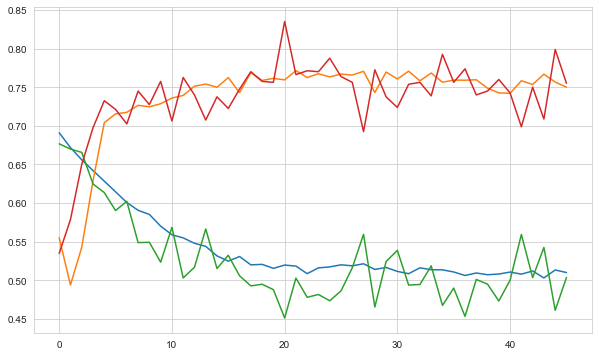

In [86]:
loss_df = pd.DataFrame(model.history.history)
plt.plot(loss_df);

In [87]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1397  196]
 [ 185  222]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1593
           1       0.53      0.55      0.54       407

    accuracy                           0.81      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.81      0.81      0.81      2000



In [88]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [89]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=25, restore_best_weights=True)

In [90]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=600, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/600
57/57 [==============================] - 1s 7ms/step - loss: 0.6901 - accuracy: 0.5579 - val_loss: 0.6157 - val_accuracy: 0.7500
Epoch 2/600
57/57 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.5560 - val_loss: 0.6309 - val_accuracy: 0.7000
Epoch 3/600
57/57 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6029 - val_loss: 0.5892 - val_accuracy: 0.7175
Epoch 4/600
57/57 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6782 - val_loss: 0.5977 - val_accuracy: 0.6850
Epoch 5/600
57/57 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6868 - val_loss: 0.5268 - val_accuracy: 0.7575
Epoch 6/600
57/57 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7068 - val_loss: 0.6092 - val_accuracy: 0.6800
Epoch 7/600
57/57 [==============================] - 0s 3ms/step - loss: 0.5869 - accuracy: 0.7065 - val_loss: 0.5463 - val_accuracy: 0.7462
Epoch 8/600
5

Epoch 59/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7837 - val_loss: 0.5357 - val_accuracy: 0.7325
Epoch 60/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7776 - val_loss: 0.5116 - val_accuracy: 0.7625
Epoch 61/600
57/57 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.7833 - val_loss: 0.5713 - val_accuracy: 0.7000
Epoch 62/600
57/57 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7908 - val_loss: 0.5070 - val_accuracy: 0.7638
Epoch 63/600
57/57 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7754 - val_loss: 0.4699 - val_accuracy: 0.7975
Epoch 64/600
57/57 [==============================] - 0s 4ms/step - loss: 0.5126 - accuracy: 0.7883 - val_loss: 0.5040 - val_accuracy: 0.7650
Epoch 65/600
57/57 [==============================] - 0s 4ms/step - loss: 0.5108 - accuracy: 0.7843 - val_loss: 0.5145 - val_accuracy: 0.7525
Epoch 

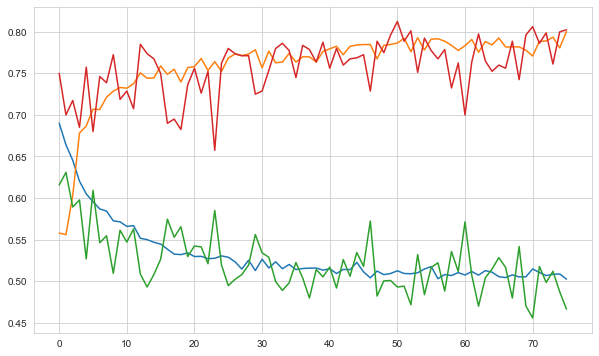

In [91]:
loss_df = pd.DataFrame(model.history.history)
plt.plot(loss_df);

In [92]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1336  257]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1593
           1       0.49      0.61      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.79      0.80      2000



## GridSearchCV

In [93]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [94]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [95]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [96]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [97]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.15, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)
    


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
27/27 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.3103 - val_loss: 0.6916 - val_accuracy: 0.4525
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5194 - val_loss: 0.6415 - val_accuracy: 0.6575
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.6100 - val_loss: 0.6364 - val_accuracy: 0.6292
Epoch 4/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6665 - accuracy: 0.5604 - val_loss: 0.6442 - val_accuracy: 0.5983
Epoch 5/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.5781 - val_loss: 0.6228 - val_accuracy: 0.6550
Epoch 6/200
27/27 [==============================] - 0s 6ms/step - loss: 0.6468 - accuracy: 0.5884 - val_loss: 0.6195 - val_accuracy: 0.6533
Epoch 7/200
27/27 [==============================] - 0s 6ms/step - loss: 0.6451 - accuracy:

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002387700B3D0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [98]:
grid_model.best_score_

0.8252499999999999

In [99]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [100]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1353  240]
 [ 158  249]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1593
           1       0.51      0.61      0.56       407

    accuracy                           0.80      2000
   macro avg       0.70      0.73      0.71      2000
weighted avg       0.82      0.80      0.81      2000



### Precision-Recall Curve and AP (Average Precision) for grid_model

63/63 [==============================] - 0s 1ms/step


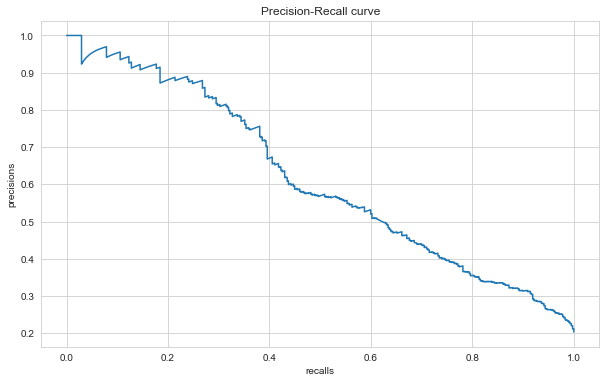

In [101]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [102]:
average_precision_score(y_test, y_pred_proba)

0.6148442567517857

# Final Model and Model Deployment

In [103]:
import pickle 
pickle.dump(scaler, open("scaler_churn", "wb"))

In [104]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005) # Default 0.001 already
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [105]:
early_stop = EarlyStopping(monitor="val_accuracy",  mode="max",  patience=25, restore_best_weights = True)

In [106]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          batch_size=356, 
          epochs=600, 
          callbacks=[early_stop],
         class_weight=class_weights)

Epoch 1/600
23/23 [==============================] - 1s 12ms/step - loss: 0.6727 - accuracy: 0.5807 - val_loss: 0.6852 - val_accuracy: 0.5860
Epoch 2/600
23/23 [==============================] - 0s 5ms/step - loss: 0.6394 - accuracy: 0.6687 - val_loss: 0.6640 - val_accuracy: 0.6220
Epoch 3/600
23/23 [==============================] - 0s 6ms/step - loss: 0.6152 - accuracy: 0.6526 - val_loss: 0.5588 - val_accuracy: 0.7350
Epoch 4/600
23/23 [==============================] - 0s 6ms/step - loss: 0.5883 - accuracy: 0.6906 - val_loss: 0.5772 - val_accuracy: 0.7105
Epoch 5/600
23/23 [==============================] - 0s 5ms/step - loss: 0.5696 - accuracy: 0.7176 - val_loss: 0.6352 - val_accuracy: 0.6605
Epoch 6/600
23/23 [==============================] - 0s 6ms/step - loss: 0.5585 - accuracy: 0.7185 - val_loss: 0.5365 - val_accuracy: 0.7495
Epoch 7/600
23/23 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.7300 - val_loss: 0.5303 - val_accuracy: 0.7475
Epoch 8/600


Epoch 59/600
23/23 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.7970 - val_loss: 0.4667 - val_accuracy: 0.7775


<AxesSubplot:>

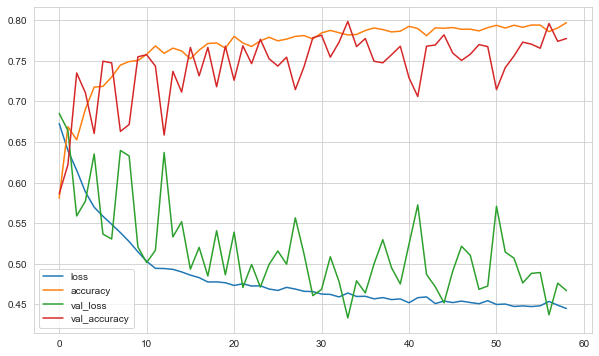

In [107]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [108]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1361  232]
 [ 171  236]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1593
           1       0.50      0.58      0.54       407

    accuracy                           0.80      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.80      0.80      2000



In [109]:
model.save('model_churn.h5')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___